# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric (AOV) and the current analysis in general. Support your answers with appropriate visualizations.

- Propose a new metric that better represents the behavior of the stores' customers. Why are these metrics better and what are their values?

- Using the `created_at` column as a proxy for the date and time of order creation, provide a brief analysis of the trends in the customers' purchasing behavior.

Show all of your work in this notebook.

In [650]:
import pandas as pd
df = pd.read_csv("orders.csv")

<Axes: title={'center': 'Distribution of Order Value over Total Items\n (w/o removal of outliers)'}, xlabel='total_items', ylabel='order_value'>

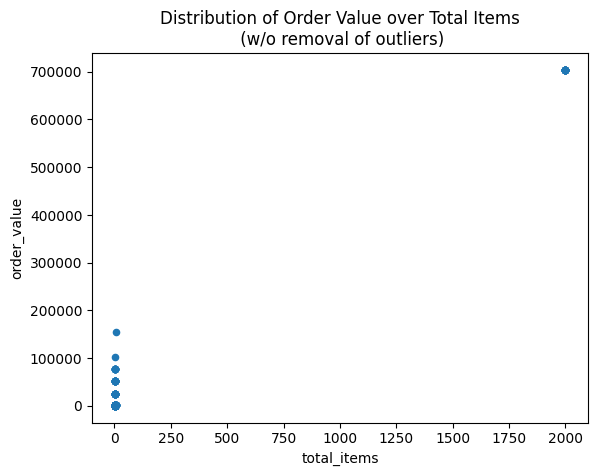

In [651]:
import numpy as np

df.plot.scatter(x="total_items", y="order_value", title="Distribution of Order Value over Total Items\n (w/o removal of outliers)")

<Axes: title={'center': 'Distribution of Order Value over Total Items\n (w/ removal of item outliers)'}, xlabel='total_items', ylabel='order_value'>

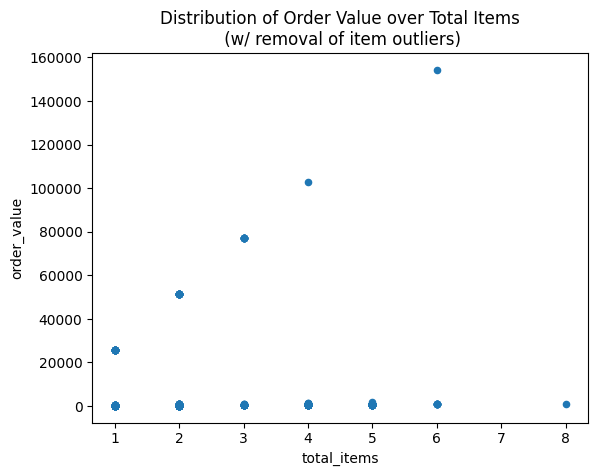

In [652]:
totalItemMean = np.mean(df["total_items"])
totalItemSTDEV = np.std(df["total_items"])
for x in df["order_id"]:
    if df["total_items"][x-1] > totalItemMean + (2 * totalItemSTDEV):
        df = df.drop([x-1])

df.plot.scatter(x="total_items", y="order_value", title="Distribution of Order Value over Total Items\n (w/ removal of item outliers)")

<Axes: title={'center': 'Distribution of Order Value over Total Items\n (w/ removal of order value outliers)'}, xlabel='total_items', ylabel='order_value'>

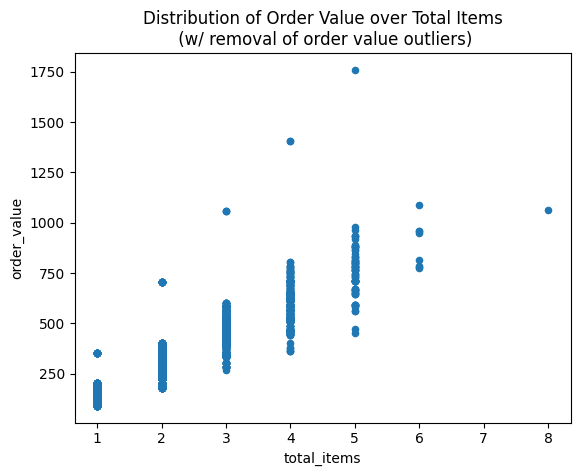

In [653]:
orderValueMean = np.mean(df["order_value"])
orderValueSTDEV = np.std(df["order_value"])
for x in df["order_id"]:
    if df["order_value"][x-1] > orderValueMean + (2 * orderValueSTDEV):
        df = df.drop([x-1])
df.plot.scatter(x="total_items", y="order_value", title="Distribution of Order Value over Total Items\n (w/ removal of order value outliers)")

Mean is not a resilient measure of center and is distorted by outliers. This means that using the mean to measure the average order value will provide erroneous results. As can be seen in `plot 1`, there are outliers at 2000 total_items and at 700000 order_value which are skewing the data towards a much higher average than intended.

As can be seen in `Plot 2` and `Plot 3`, when the outliers are moved from the dataset, a much clearer picture of where the true average order value should lie.

In [654]:
biasedAOV = np.mean(df["order_value"])
adjustedAOV = np.mean(df["order_value"])
adjustedAOV

302.58051448247926

In [655]:
medianAOV = np.median(df['order_value'])
medianAOV

284.0

As stated above, once the outliers are removed, the new average order value is a much better estimate for the true value. With the outliers removed, the new average order value comes out to `$263.45`.

Another option is to a resilient measure of center in order to find the average order value. The obvious choice is the median, and when combined with our afermentioned `adjustedAOV`, we will have a much better understanding of the skew and distribution of the data. Given outliers negligible affect on median, the value for `medianAOV` comes out to `$260`.

Combining these two peices of data, we can make the assertion that because the mean is greater than the median, the dataset is skewed the right. Which makes sense considering the context that order_values have a minimum value of $0, but an infinite maximum value.

In [656]:
import matplotlib.pyplot as plt
orderValue = df['order_value']
orderItemCount = df['total_items']

In [657]:
df['created_at'] = (pd.to_datetime(df['created_at']).dt.hour + (pd.to_datetime(df['created_at']).dt.minute / 60))
df.sort_values(by=['created_at'], ascending=True, inplace=True)

In [658]:
orderValueAtHour = df['order_value']
orderTotalItemsAtHour = df['total_items']
averageAtHour = df['created_at']

<Axes: xlabel='created_at'>

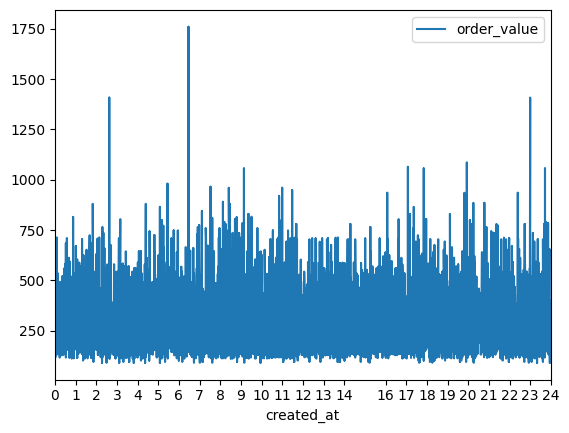

In [659]:
df.plot(x='created_at', y='order_value', xlim=[0,24], xticks=df.index)

<Axes: xlabel='created_at'>

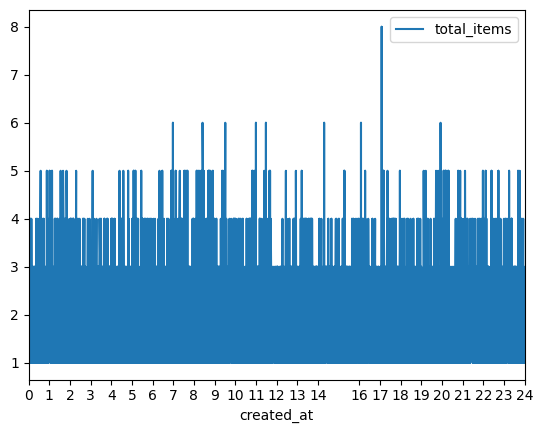

In [660]:
df.plot(x='created_at', y='total_items', xlim=[0,24], xticks=df.index)

Note: I adjusted the dates and times provided to only include the time and then converted that time into hours

I chose the analyze customer's order_value's and total_items over time. I thought it would be interesting to see if there were any particular hour ranges where either variable were relatively high.

From my analysis it (roughly) seems like there a couple periods of time where order_value is relatively high. Such as between (what appears to be) 7am to 12pm. 

Fitting  a sinusodial regression line to each plot would make further analysis of "increased activity" easier to locate.